In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jacopoferretti/expedia-travel-dataset")

print("Path to dataset files:", path)

c:\GitHub\expedia-data-mining\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\bruno\.cache\kagglehub\datasets\jacopoferretti\expedia-travel-dataset\versions\1


In [2]:
import pandas as pd

data = pd.read_csv(f"{path}/travel.csv")
display(data)

# Display basic information about the dataset to help answer the questions
data_info = data.info()
data_head = data.head()

data_info, data_head

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,...,1,1,12812,5,0,1,2,50,368,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,18926976,2013-03-31 16:45:01,2,3,66,351,21609,1386.4061,858268,0,...,0,1,762,6,0,1,2,50,503,91
99996,2700011,2013-09-29 14:09:07,2,3,66,462,49272,698.1395,957708,0,...,0,1,12843,5,0,1,2,50,661,6
99997,35620410,2014-07-11 22:05:54,37,1,69,998,52849,NaN,814512,1,...,0,3,18773,1,0,1,6,22,1794,38
99998,25735008,2013-07-02 01:03:12,2,3,66,246,28491,207.2549,881704,0,...,0,1,8859,1,0,1,2,50,212,89


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

(None,
    Unnamed: 0            date_time  site_name  posa_continent  \
 0    24636210  2014-11-03 16:02:28         24               2   
 1    19837144  2013-03-13 19:25:01         11               3   
 2    13066459  2014-10-13 13:20:25          2               3   
 3     4691082  2013-11-05 10:40:34         11               3   
 4     4878884  2014-06-10 13:34:56          2               3   
 
    user_location_country  user_location_region  user_location_city  \
 0                     77                   871               36643   
 1                    205                   135               38749   
 2                     66                   314               48562   
 3                    205                   411               52752   
 4                     66                   174               50644   
 
    orig_destination_distance  user_id  is_mobile  ...  srch_children_cnt  \
 0                   456.1151   792280          0  ...                  0   
 1           

In [7]:
# Removendo linhas com valores nulos
data_cleaned = data.dropna()

# Conferindo se srch_children_cnt + srch_adults_cnt > 0
data_cleaned = data_cleaned[
    (data_cleaned['srch_children_cnt'] + data_cleaned['srch_adults_cnt']) > 0
]

# Conferindo se srch_adults_cnt > 0
data_cleaned = data_cleaned[data_cleaned['srch_adults_cnt'] > 0]

# Convertendo colunas para datetime
data_cleaned['date_time'] = pd.to_datetime(data_cleaned['date_time'], errors='coerce')
data_cleaned['srch_ci'] = pd.to_datetime(data_cleaned['srch_ci'], errors='coerce')
data_cleaned['srch_co'] = pd.to_datetime(data_cleaned['srch_co'], errors='coerce')

# Criando as colunas travel_duration e days_in_advance
data_cleaned['travel_duration'] = (data_cleaned['srch_co'] - data_cleaned['srch_ci']).dt.days
data_cleaned['days_in_advance'] = (data_cleaned['srch_ci'] - data_cleaned['date_time']).dt.days

# Removendo valores inconsistentes de travel_duration (duração da viagem deve ser positiva)
data_cleaned = data_cleaned[data_cleaned['travel_duration'] > 0]

# Exibindo informações finais do dataset limpo
data_cleaned.info(), data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 63485 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 63485 non-null  int64         
 1   date_time                  63485 non-null  datetime64[ns]
 2   site_name                  63485 non-null  int64         
 3   posa_continent             63485 non-null  int64         
 4   user_location_country      63485 non-null  int64         
 5   user_location_region       63485 non-null  int64         
 6   user_location_city         63485 non-null  int64         
 7   orig_destination_distance  63485 non-null  float64       
 8   user_id                    63485 non-null  int64         
 9   is_mobile                  63485 non-null  int64         
 10  is_package                 63485 non-null  int64         
 11  channel                    63485 non-null  int64         
 12  srch_ci  

(None,
    Unnamed: 0           date_time  site_name  posa_continent  \
 0    24636210 2014-11-03 16:02:28         24               2   
 1    19837144 2013-03-13 19:25:01         11               3   
 2    13066459 2014-10-13 13:20:25          2               3   
 3     4691082 2013-11-05 10:40:34         11               3   
 5    34825186 2014-12-16 14:34:39          2               3   
 
    user_location_country  user_location_region  user_location_city  \
 0                     77                   871               36643   
 1                    205                   135               38749   
 2                     66                   314               48562   
 3                    205                   411               52752   
 5                     66                   220               38273   
 
    orig_destination_distance  user_id  is_mobile  ...  srch_destination_id  \
 0                   456.1151   792280          0  ...                 8286   
 1             

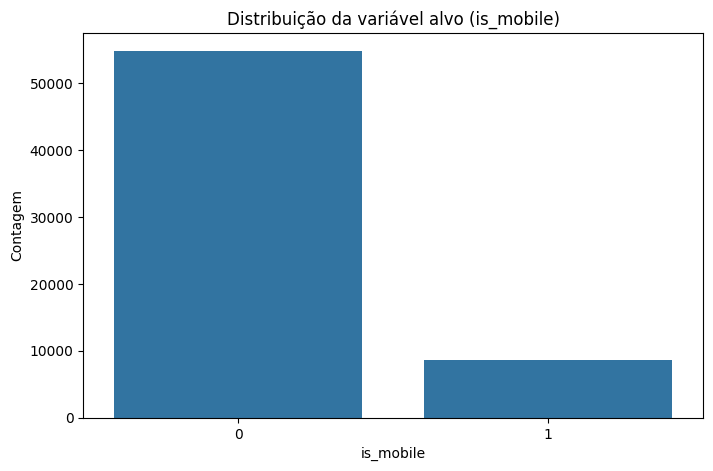

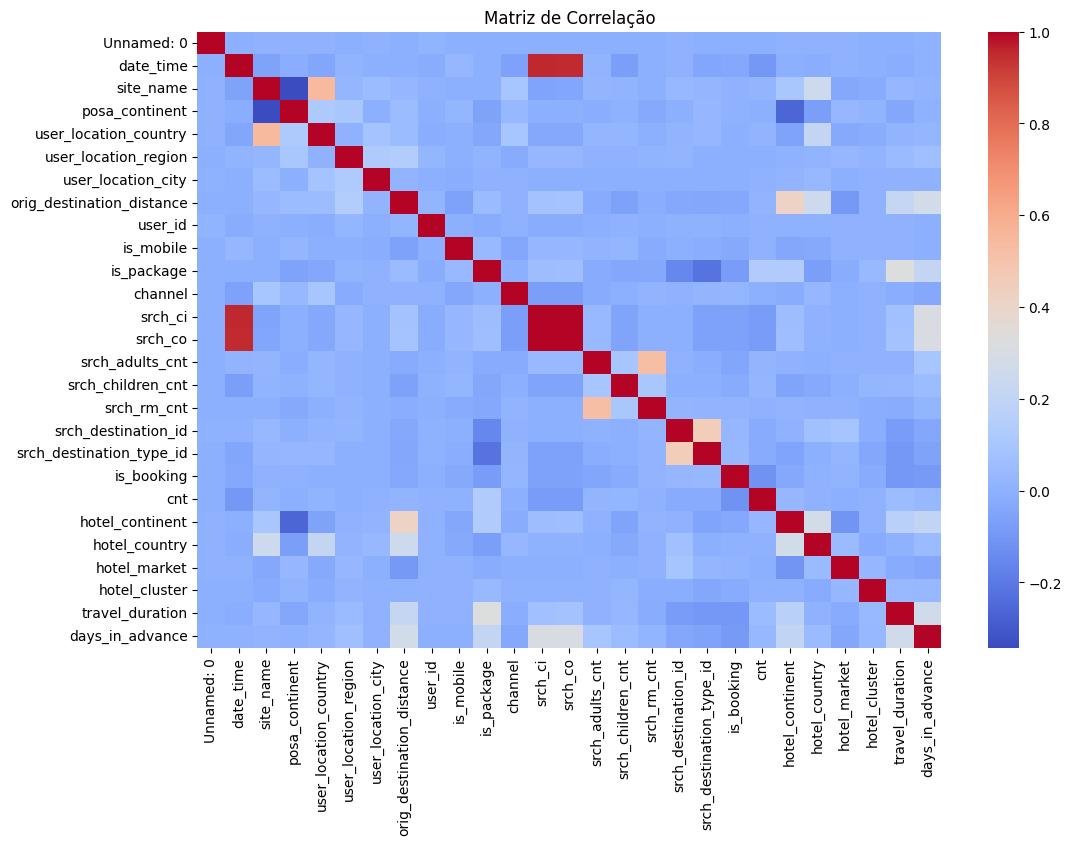

(Unnamed: 0                   0
 date_time                    0
 site_name                    0
 posa_continent               0
 user_location_country        0
 user_location_region         0
 user_location_city           0
 orig_destination_distance    0
 user_id                      0
 is_mobile                    0
 is_package                   0
 channel                      0
 srch_ci                      0
 srch_co                      0
 srch_adults_cnt              0
 srch_children_cnt            0
 srch_rm_cnt                  0
 srch_destination_id          0
 srch_destination_type_id     0
 is_booking                   0
 cnt                          0
 hotel_continent              0
 hotel_country                0
 hotel_market                 0
 hotel_cluster                0
 travel_duration              0
 days_in_advance              0
 dtype: int64,
 np.int64(0),
          Unnamed: 0                      date_time     site_name  \
 count  6.348500e+04                  

In [9]:
# Re-importando as bibliotecas e carregando o dataset novamente devido ao reset de estado
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar valores nulos, estatísticas descritivas e duplicados
null_values = data_cleaned.isnull().sum()
duplicates = data_cleaned.duplicated().sum()
stats_desc = data_cleaned.describe()

# Visualizar a distribuição da variável alvo
plt.figure(figsize=(8, 5))
sns.countplot(x='is_mobile', data=data_cleaned)
plt.title('Distribuição da variável alvo (is_mobile)')
plt.xlabel('is_mobile')
plt.ylabel('Contagem')
plt.show()

# Verificar correlações iniciais
correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Exibir valores nulos, duplicados e estatísticas descritivas
null_values, duplicates, stats_desc


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Separando os recursos (features) e a variável alvo (target)
X = data_cleaned.drop(columns=['is_mobile'])
y = data_cleaned['is_mobile']

# Dividindo os dados em treino e teste (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Concatenando novamente os dados de treino para aplicar técnicas de balanceamento
train_data = pd.concat([X_train, y_train], axis=1)

# Separando classes majoritárias e minoritárias
majority_class = train_data[train_data['is_mobile'] == 0]
minority_class = train_data[train_data['is_mobile'] == 1]

# Aplicando oversampling (SMOTE pode ser usado como alternativa mais avançada)
minority_upsampled = resample(minority_class, 
                              replace=True, 
                              n_samples=len(majority_class), 
                              random_state=42)

# Concatenando as classes balanceadas
balanced_train_data = pd.concat([majority_class, minority_upsampled])

# Separando novamente em X e y
X_train_balanced = balanced_train_data.drop(columns=['is_mobile'])
y_train_balanced = balanced_train_data['is_mobile']

# Verificando as proporções no conjunto balanceado
y_train_balanced.value_counts()


is_mobile
0    43889
1    43889
Name: count, dtype: int64

In [13]:
display(X_train_balanced)
display(y_train_balanced)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_package,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,travel_duration,days_in_advance
85804,29469050,2014-12-20 16:51:12,2,3,66,462,27117,956.4174,459068,0,...,564,4,0,1,2,50,1633,6,5,62
11604,35549311,2013-01-29 14:36:27,2,3,66,448,4730,630.4776,548386,0,...,1613,1,0,1,2,50,602,47,1,65
46550,21213356,2014-04-08 07:56:31,2,3,66,448,53078,96.7211,278193,0,...,33126,4,0,1,2,50,694,13,1,45
77236,27943320,2014-10-17 10:59:14,2,3,66,348,48862,3585.4943,66927,0,...,8255,1,0,2,6,77,20,41,2,13
9846,32188281,2014-11-16 17:46:13,2,3,66,174,24103,2451.1628,325303,0,...,7635,3,0,1,2,50,675,70,4,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65467,10892273,2013-09-25 19:02:10,2,3,66,442,28620,2156.8631,1084927,0,...,20043,6,0,2,4,96,201,78,15,82
89653,4824844,2014-09-13 11:38:50,2,3,66,174,25897,343.8582,465227,0,...,64627,6,0,2,2,50,1632,18,1,21
70839,28446643,2014-02-17 00:03:45,8,4,77,462,3492,2430.1000,210111,1,...,8819,1,0,4,3,168,1242,6,4,24
5048,4877122,2014-06-09 23:02:37,2,3,66,174,9444,903.2570,590052,1,...,8824,1,0,6,4,8,118,66,4,22


85804    0
11604    0
46550    0
77236    0
9846     0
        ..
65467    1
89653    1
70839    1
5048     1
50527    1
Name: is_mobile, Length: 87778, dtype: int64

In [16]:
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Configurando os modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Função para treinar e avaliar os modelos
results = {}
for model_name, model in tqdm(models.items()):
    # Treinando o modelo
    model.fit(X_train_balanced.values, y_train_balanced.values)
    
    # Fazendo previsões
    y_pred = model.predict(X_test.values)
    
    # Calculando métricas
    accuracy = accuracy_score(y_test.values, y_pred)
    f1 = f1_score(y_test.values, y_pred)
    auc_roc = roc_auc_score(y_test.values, model.predict_proba(X_test.values)[:, 1])
    
    # Cross-validation
    cross_val = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1').mean()
    
    # Armazenando os resultados
    results[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "AUC-ROC": auc_roc,
        "Cross-Val F1-Score": cross_val
    }


  0%|          | 0/3 [00:00<?, ?it/s]


TypeError: float() argument must be a string or a real number, not 'Timestamp'